# Kaggle Teams in 2016

### Who do you team with on Kaggle?

Data for this analysis comes from the Kaggle Leaderboard as of February 17, 2016. The data was extracted by web-scraping Kaggle’s leaderboard web pages. Source code for web-scraping and data pre-processing can be found at this [github repository](https://github.com/jimthompson5802/kaggle-RScript).  This analysis builds on previous analysis of Kaggle teams [by country](https://www.kaggle.com/jimthompson/introducing-kaggle-scripts/kaggle-competition-medal-count-analysis), [by team structure](https://www.kaggle.com/jimthompson/introducing-kaggle-scripts/visualizing-kaggle-team-structures), [by profile](http://notesofdabbler.github.io/201412_exploreKaggle/exploreKaggleUsers.html), and [over time](https://www.kaggle.com/jeffhebert/d/kaggle/meta-kaggle/kaggle-competitions-over-time).

As of February 17, 2016 there were 200 completed and 13 incomplete competitions. Of the completed ones, we were able to scrape 199 competitions (failing to scrape one).  From this set, this analysis focused on competitions with a cash prize, excluding competitions listed as Jobs, Knowledge, Kudos, Private and Swag. This subselection resulted in 151 candidate competitions, of which 133 had teams.

Of the candidate competitions, 14 did not contain Leaderboard information and were excluded from the analysis. This resulted in 122 competitions for analysis.

In [303]:
# imports
import sys # for stderr
import numpy as np
import pandas as pd
import sklearn as skl
from sklearn import metrics
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# versions 
import sys
print(pd.datetime.now())
print('Python: '+sys.version)
print('numpy: '+np.__version__)
print('pandas: '+pd.__version__)
print('sklearn: '+skl.__version__)

2016-02-18 10:27:40.500000
Python: 3.3.5 |Anaconda 2.2.0 (x86_64)| (default, Sep  2 2014, 13:57:31) 
[GCC 4.2.1 (Apple Inc. build 5577)]
numpy: 1.10.4
pandas: 0.17.1
sklearn: 0.16.1


In [305]:
# settings 
inline_rc = dict(mpl.rcParams)
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12.0, 8.0)
# pd.set_option('display.max_rows', 50)
# pd.set_option('display.max_columns', 50)

## Competitions

In [4]:
competitions = pd.read_csv('./comps.csv')
competitions.shape

(199, 8)

In [5]:
competitions[:5]

,competition_name,competition_url,competition_type,prize_amount,number_of_teams,deadline,start_date,end_date
0,Heritage Health Prize,//www.heritagehealthprize.com/c/hhp,standard,500000,1353,2 years ago,2011-04-04 17:03:00,2013-04-04 07:00:00
1,GE Flight Quest,//www.gequest.com/c/flight,standard,250000,173,2 years ago,2012-11-28 18:36:00,2013-03-11 23:59:00
2,"Flight Quest 2: Flight Optimization, Milestone...",//www.gequest.com/c/flight2-milestone,standard,250000,129,2 years ago,2013-08-06 03:44:00,2013-09-25 23:59:00
3,"Flight Quest 2: Flight Optimization, Main Phase",//www.gequest.com/c/flight2-main,standard,220000,121,2 years ago,2013-09-26 16:46:00,2014-01-18 23:59:00
4,"Flight Quest 2: Flight Optimization, Final Phase",//www.gequest.com/c/flight2-final,standard,220000,33,24 months ago,2014-01-19 00:00:00,2014-02-23 23:59:00


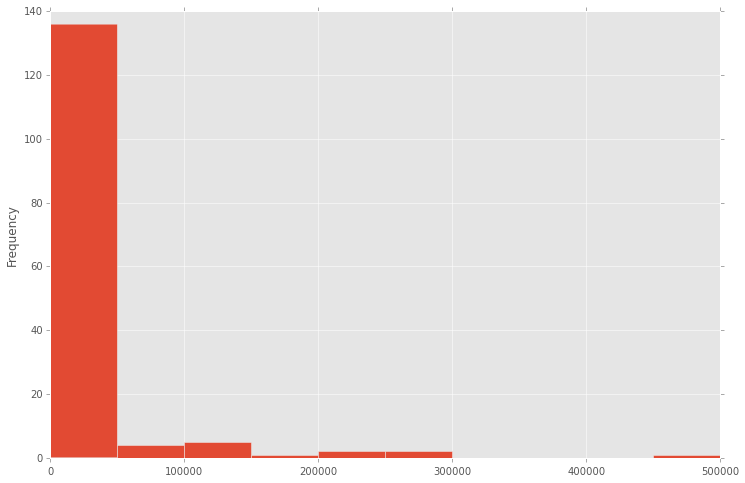

In [6]:
competitions.prize_amount.plot.hist()

### How many competitions?

In [7]:
competitions.competition_type.value_counts().to_frame()

,competition_type
standard,151
Knowledge,16
Private,11
Swag,9
Jobs,9
Kudos,3


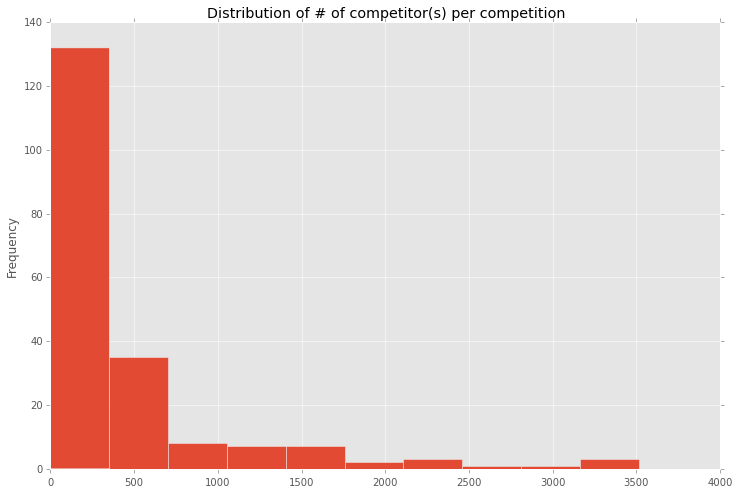

In [8]:
competitions.number_of_teams.plot.hist(title='Distribution of # of competitor(s) per competition')

## Teams

In [83]:
# How many members in all competitions?
team_members = pd.read_csv('teams.csv')
team_members.shape[0]

75679

In [84]:
team_members[:5]

,competition_name,team_type,team_place,team_name,member_name,member_url
0,Heritage Health Prize,team-link team-player,1,POWERDOT,David Vogel,/dvmodeler
1,Heritage Health Prize,team-link team-player,1,POWERDOT,Sali Mali,/salimali
2,Heritage Health Prize,team-link team-player,1,POWERDOT,Randy,/users/10634/randy
3,Heritage Health Prize,team-link team-player,1,POWERDOT,Edward,/users/6395/edward
4,Heritage Health Prize,team-link team-player,1,POWERDOT,Willem Mestrom,/wmestrom


In [85]:
# How many teams by type?
team_members.team_type.value_counts()

team-link single-player    60538
team-link team-player      14998
anonymous-type               143
Name: team_type, dtype: int64

In [24]:
# How many members were on teams ?
teams = team_members[team_members.team_type == 'team-link team-player']
teams.shape[0]

14998

In [ ]:
#ts = team_members.groupby('member_url')

In [50]:

member_count = teams.groupby(['competition_name','team_name']).count().team_type.to_frame()
member_count.columns = ['member_count']
member_count[:5]

member_count
competition_name                              team_name                       
AMS 2013-2014 Solar Energy Prediction Contest 1907 Chicago Cubs              3
                                              BS Man & Paul Duan             2
                                              Carma Pack                     2
                                              Chocolate Moose                4
                                              Cyberport                      3

In [89]:
# There are times when there are more than one team with the same name in the same competition
# but that only happens once for a team of type 'single-player'
# I did check that 'single-player' teams are in fact always single member
# and that 'team-player' teams always have more than one member
(member_count.member_count < 2).sum()

0

In [65]:
member_count.member_count.value_counts().sort_index().to_frame()

,member_count
2,3436
3,1205
4,483
5,193
6,92
7,37
8,19
9,7
10,9
11,9


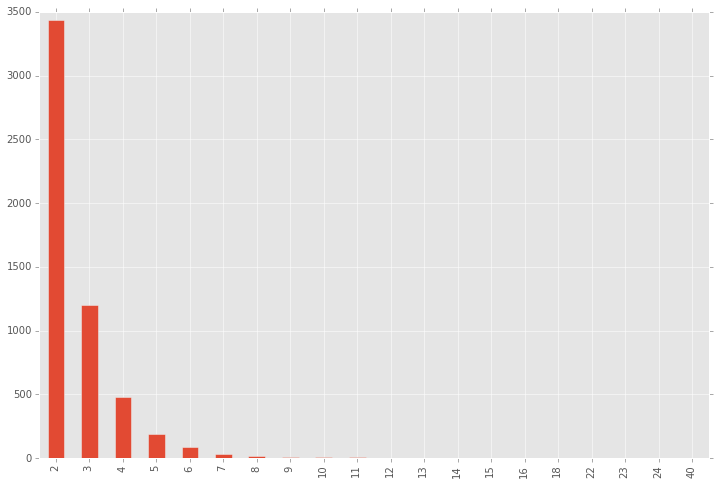

In [64]:
member_count.member_count.value_counts().sort_index().plot.bar()

In [51]:
# Number of unique members over all competitions
len(team_members.member_url.unique())

37580

In [52]:
# Number of unique team members over all compatitions
teams.member_url.unique().shape[0]

11213

In [53]:
# Using N different team names
teams.member_name.unique().shape[0]

10948

In [ ]:
# Of which N were active in the last year


In [67]:
# Which competitions had the most teams?
team_counts = member_count.reset_index().groupby('competition_name').count().team_name.to_frame().sort_values(by='team_name', ascending=False)
team_counts.columns = ['team_counts']
team_counts[:10]

,team_counts
competition_name,
Rossmann Store Sales,267
Otto Group Product Classification Challenge,227
Driver Telematics Analysis,186
Springleaf Marketing Response,165
Heritage Health Prize,160
Click-Through Rate Prediction,157
Allstate Purchase Prediction Challenge,152
Restaurant Revenue Prediction,141
National Data Science Bowl,134


In [69]:
# How many competitions had teams?
team_counts.shape[0]

133

In [ ]:
# Which team name won the most competitions?


In [ ]:
# Which team came in the top ten the most?


In [ ]:
# Which team members won the most when on a team?


### Which are the largest teams?

In [224]:
teams_size = teams.groupby(['competition_name','team_name']).count()
teams_size = teams_size.member_name.sort_values(ascending=False).to_frame()
teams_size.columns = ['num_members']
teams_size[:10]

,,num_members
competition_name,team_name,
Algorithmic Trading Challenge,Concrete Narwhal,40
KDD Cup 2013 - Author Disambiguation Challenge (Track 2),Algorithm @ National Taiwan University,24
Loan Default Prediction - Imperial College London,Delicious Food,24
KDD Cup 2013 - Author-Paper Identification Challenge (Track 1),Algorithm @ National Taiwan University,24
"KDD Cup 2012, Track 1",Catch up,23
"KDD Cup 2012, Track 2",Catch up @ National Taiwan University,23
CONNECTOMICS,Harvard Stat 183,22
Acquire Valued Shoppers Challenge,Delicious Food,22
Caterpillar Tube Pricing,PointSeerPH,18


### Who has teamed up the most ?

In [222]:
num_teams = teams.groupby('member_url').count()
num_teams = num_teams.member_name.sort_values(ascending=False).to_frame()
num_teams.columns = ['num_teams']
num_teams[:10]

,num_teams
member_url,
/jiweiliu,34
/kazanova,32
/konradb,29
/abhishek,28
/xueerchen,27
/leustagos,26
/mlandry,24
/titericz,22
/thakurrajanand,22


In [105]:
# do members change their name?
# teams.groupby(['member_url','member_name']).?

### Who has teamed up with the most (distinct) people ?

In [134]:
ttr = pd.DataFrame({'count' : team_members.groupby(['competition_name','team_name']).size()}).reset_index()

In [145]:
ttr = team_members.copy()
ttr.set_index(['competition_name','team_name','team_place','team_type'], inplace=True)
ttr.reset_index(level=3, inplace=True)
ttr.iloc[:10]

team_type  \
competition_name      team_name     team_place                          
Heritage Health Prize POWERDOT      1           team-link team-player   
                                    1           team-link team-player   
                                    1           team-link team-player   
                                    1           team-link team-player   
                                    1           team-link team-player   
                                    1           team-link team-player   
                                    1           team-link team-player   
                      EXL Analytics 2           team-link team-player   
                                    2           team-link team-player   
                                    2           team-link team-player   

                                                   member_name  \
competition_name      team_name     team_place                   
Heritage Health Prize POWERDOT      1              David Vogel   
                                    1                Sali Mali   
                                    1                    Randy   
                                    1                   Edward   
                                    1           Willem Mestrom   
                                    1                    infty   
                                    1           random modeler   
                      EXL Analytics 2           Sassoon Kosian   
                                    2                     DanB   
                                    2                   B Yang   

                                                                 member_url  
competition_name      team_name     team_place                               
Heritage Health Prize POWERDOT      1                            /dvmodeler  
                                    1                             /salimali  
                                    1                    /users/10634/randy  
                                    1                    /users/6395/edward  
                                    1                             /wmestrom  
                                    1                    /users/36878/infty  
                                    1           /users/36885/random-modeler  
                      EXL Analytics 2           /users/11687/sassoon-kosian  
                                    2                           /dansbecker  
                                    2                               /byang1

In [184]:
import networkx as nx
from itertools import combinations
nx.__version__

'1.9.1'

In [280]:
# TODO: really should use team_url as a unique key, not team_name, to create the graph.
# I'm sure we can do this with apply
G=nx.Graph()
for name, group in teams.groupby(['competition_name','team_name']):
    G.add_edges_from(list(combinations(list(group.member_name), 2)))

In [281]:
 G.number_of_nodes()

10946

In [282]:
G.number_of_edges()

16659

In [283]:
member_degree = pd.DataFrame(columns=['degree'], index=nx.degree(G).keys())
member_degree.degree = nx.degree(G).values()

In [284]:
member_degree.degree.sort_values(ascending=False).to_frame()

,degree
Mariahbarrio,49
JMY!!,45
SYY,45
r44,45
Cristina,44
hypertext,43
BigOld,43
msla,43
Ankit_Arya,42
Sunny,40


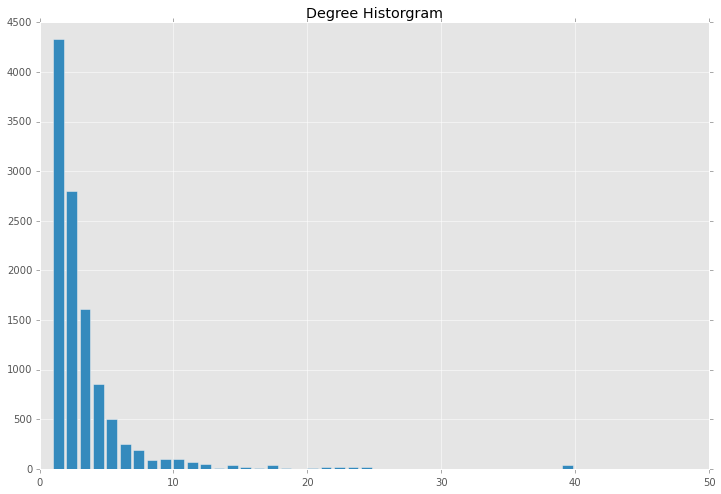

In [249]:
ax = plt.bar(list(range(len(nx.degree_histogram(G)))), nx.degree_histogram(G))
plt.title('Degree Historgram')
plt.show()

In [285]:
G.neighbors('Mariahbarrio')

['Yousuf',
 'pkamalaruban',
 'Sunny',
 'zhouxc',
 'Vikram Jha',
 'Olomana',
 'sbalajis',
 'argod',
 'Sidd',
 'dil_212000',
 'Ankit_Arya',
 'Burnrate',
 'aiamateur',
 'likethesky',
 'mleclerc',
 'wknb',
 'octonion',
 'Luffy',
 'Bogdan',
 'ejohn',
 'Cristina',
 'emantos',
 'radq',
 'Mansi',
 'nikosf',
 'Bull',
 'Rohan',
 'Sudip_Jerry',
 'udayj',
 'Herbert',
 'Younes',
 'Sourangsu',
 'ritesh',
 'dibsonmuad',
 'UrfTheManatee',
 'Noureldin',
 'mtaylor',
 'AIBrisbane',
 'mahdiiix',
 'Primatebuddy',
 'teja',
 'seemsArtless',
 'moana',
 'Jo-fai Chow',
 'jpollard',
 'Ivo Danihelka',
 'mohit',
 'Abinaya',
 'snuderl']

In [194]:
# mariahbarrio was on a large team of 40 members: https://www.kaggle.com/t/9021/concrete-narwhal

In [232]:
len(list(nx.connected_components(G)))

3392

In [234]:
len(nx.clustering(G))

11211

In [286]:
degree_centrality = pd.Series(nx.degree_centrality(G))
degree_centrality.sort_values(ascending=False, inplace=True)
degree_centrality[:5]

Mariahbarrio    0.004477
r44             0.004111
SYY             0.004111
JMY!!           0.004111
Cristina        0.004020
dtype: float64

In [287]:
degree_centrality[40:80]

jpollard                      0.003563
ejohn                         0.003563
argod                         0.003563
udayj                         0.003563
Herbert                       0.003563
Sidd                          0.003563
pkamalaruban                  0.003563
Abhishek                      0.003381
Michael                       0.003289
David                         0.002924
SteveV                        0.002741
Aleksej Jurca                 0.002741
Jure Zbontar                  0.002650
Shize Su                      0.002558
cory.lanker                   0.002558
Μαριος Μιχαηλιδης KazAnova    0.002467
rabbit125                     0.002467
hahaha                        0.002376
mlandry                       0.002376
lithio                        0.002284
Rex Ju                        0.002284
whengraduate                  0.002284
lctsai                        0.002193
Ian Lin                       0.002193
plliao                        0.002193
cebrusfs                 

In [295]:
top_graph = G.subgraph(list(profiles[:100].member_name))

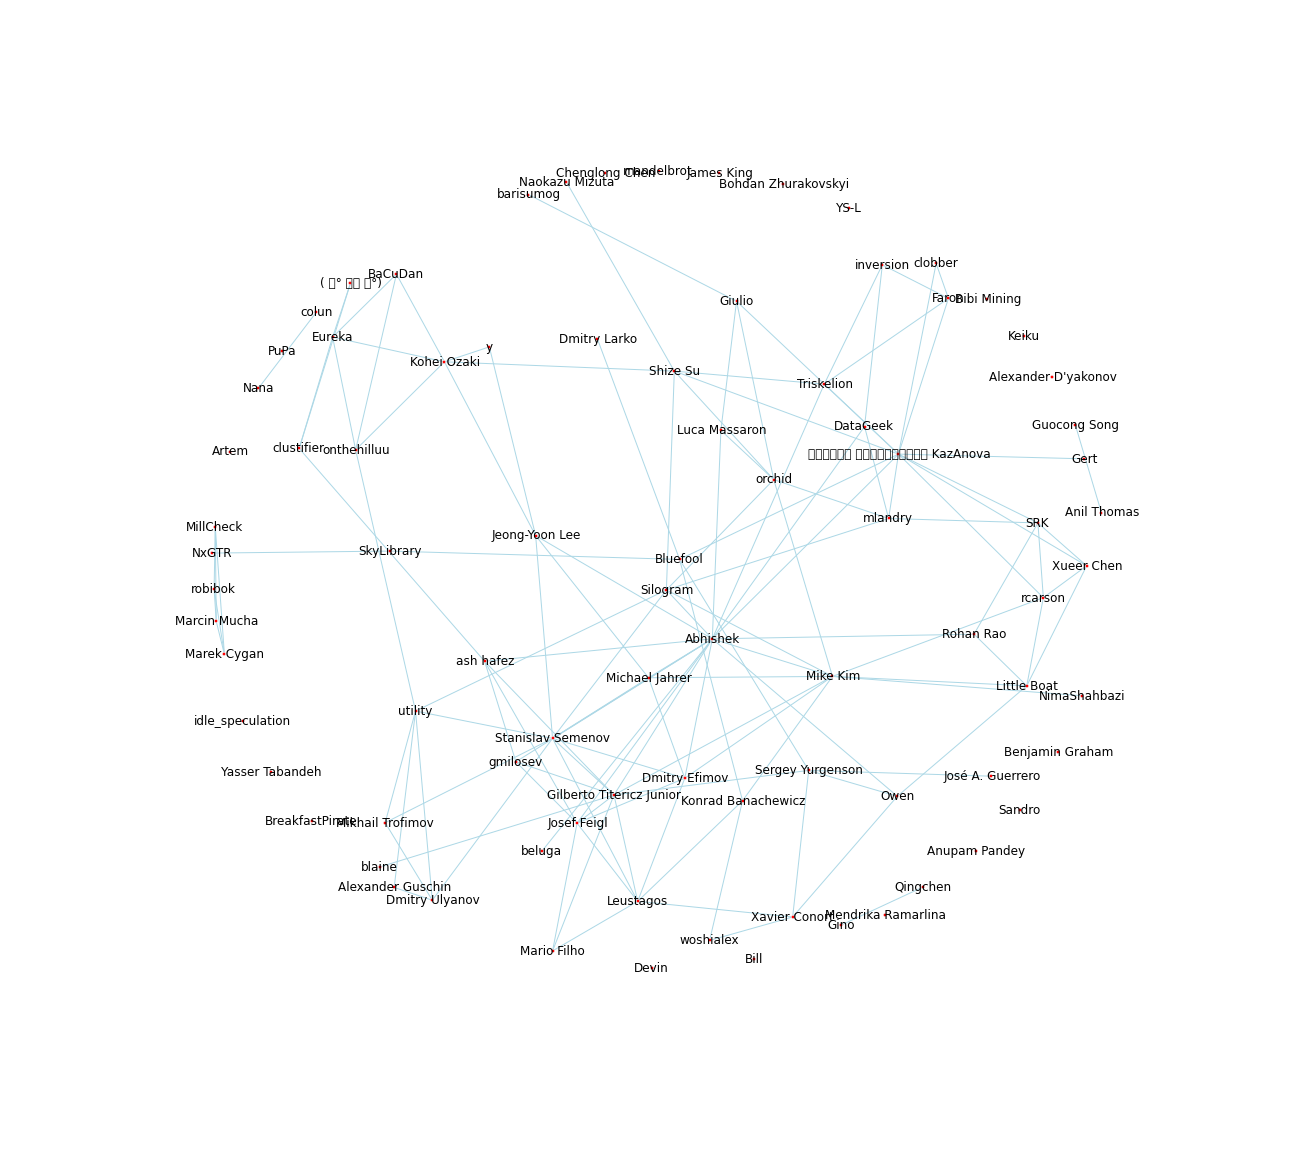

In [323]:
with plt.style.context('ggplot'):
    # mpl.rcParams.update(inline_rc)
    plt.axis('off')
    plt.rcParams['figure.figsize'] = (20, 20)
    pos = nx.spring_layout(top_graph)
    nx.draw_networkx(top_graph, pos, node_size=10, with_labels=True, edge_color='lightblue')

In [93]:
# Who has been a team captain the most ?


In [ ]:
# What are the circles of the top players?
# http://i.stanford.edu/~julian/pdfs/nips2012.pdf
# https://www.kaggle.com/c/learning-social-circles
# http://inventingsituations.net/2014/11/09/kaggle-social-networks-competition/

In [ ]:
# Who is influential ?
# https://www.kaggle.com/c/predict-who-is-more-influential-in-a-social-network


## Member Profiles

In [ ]:
# What are the skills of the top players?


In [292]:
# Do teams cluster based on skills?


In [195]:
profiles = pd.read_csv('./profiles.csv')
profiles.shape

(1200, 5)

In [196]:
profiles[:10]

,member_url,member_name,rank,num_comp,country
0,/kazanova,Μαριος Μιχαηλιδης KazAnova,1,70,Greece
1,/titericz,Gilberto Titericz Junior,2,62,Brazil
2,/stasg7,Stanislav Semenov,3,28,Russia
3,/owenzhang1,Owen,4,42,United States
4,/aguschin,Alexander Guschin,5,20,Russia
5,/abhishek,Abhishek,6,96,Germany
6,/leustagos,Leustagos,7,44,Brazil
7,/chaiml,Cardal,8,4,Israel
8,/confirm,Kohei Ozaki,9,67,Japan
9,/gertjac,Gert,10,24,The Netherlands


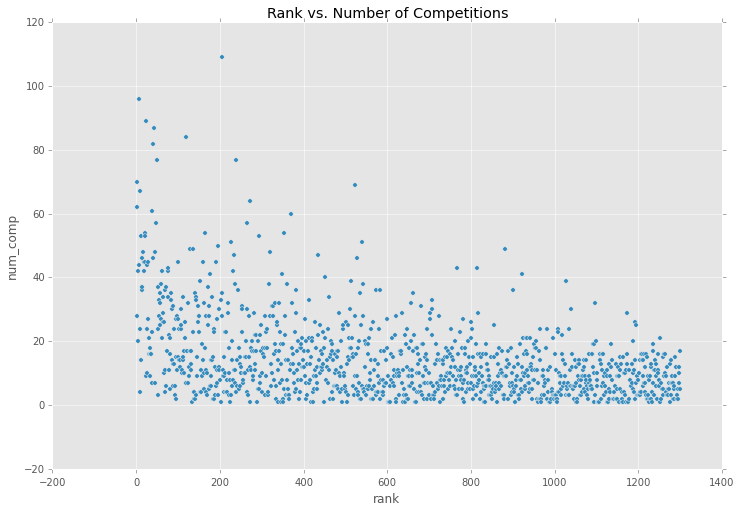

In [198]:
profiles.plot.scatter(x='rank',y='num_comp', title='Rank vs. Number of Competitions')

In [199]:
num_countries = profiles.groupby('country').num_comp.count().sort_values(ascending=False).to_frame()
num_countries.columns = ['num_countries']
num_countries.shape

(75, 1)

In [200]:
num_countries[:30]

,num_countries
country,
unknown,270
United States,237
Russia,74
India,70
United Kingdom,45
France,44
Germany,39
China,38
Japan,31


In [201]:
# profiles.to_csv('./profiles.csv', index=False)

In [202]:
# profiles.loc[profiles.country == '中国','country'] = 'China'

In [203]:
pros = profiles.join(num_teams, on='member_url', how='left')

In [204]:
pros['team_pct'] = pros.num_teams / pros.num_comp

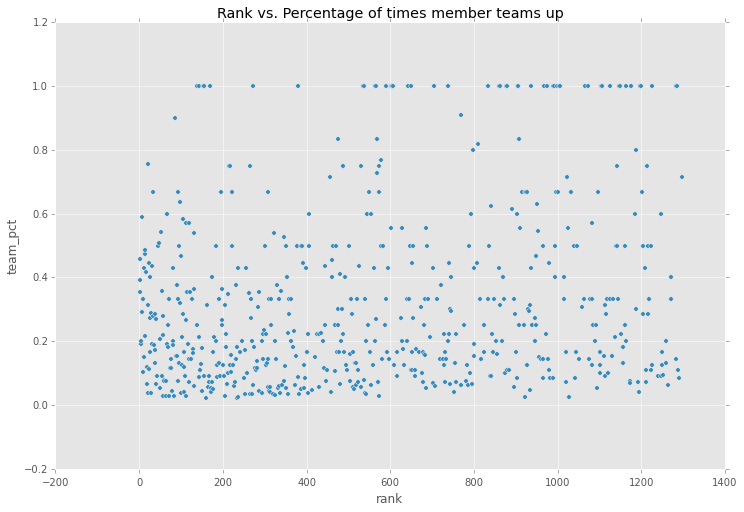

In [205]:
# 
ax = pros.plot.scatter(x='rank', y='team_pct', title='Rank vs. Percentage of times member teams up')

In [210]:
pros = pd.merge(pros, member_degree, left_on='member_url', right_index=True, how='left')

In [213]:
pros

,member_url,member_name,rank,num_comp,country,num_teams,team_pct,degree
0,/kazanova,Μαριος Μιχαηλιδης KazAnova,1,70,Greece,32,0.457143,27
1,/titericz,Gilberto Titericz Junior,2,62,Brazil,22,0.354839,16
2,/stasg7,Stanislav Semenov,3,28,Russia,11,0.392857,14
3,/owenzhang1,Owen,4,42,United States,8,0.190476,8
4,/aguschin,Alexander Guschin,5,20,Russia,4,0.200000,7
5,/abhishek,Abhishek,6,96,Germany,28,0.291667,31
6,/leustagos,Leustagos,7,44,Brazil,26,0.590909,19
7,/chaiml,Cardal,8,4,Israel,NaN,NaN,NaN
8,/confirm,Kohei Ozaki,9,67,Japan,7,0.104478,10
9,/gertjac,Gert,10,24,The Netherlands,8,0.333333,9


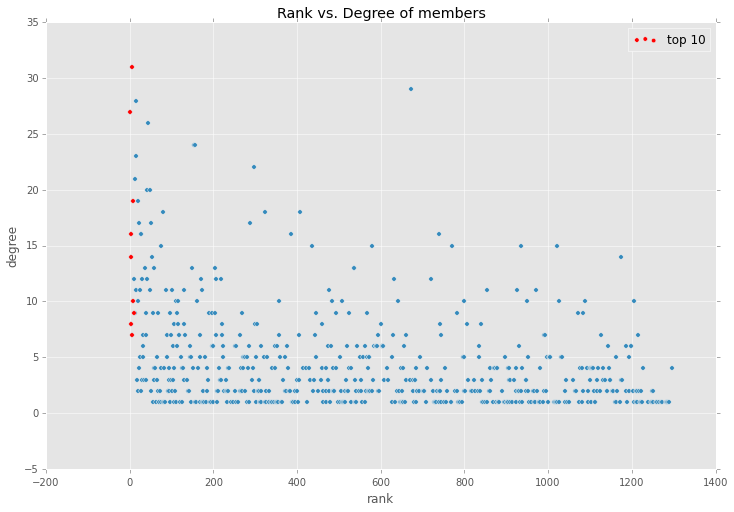

In [229]:
ax = pros.plot.scatter(x='rank', y='degree', title='Rank vs. Degree of members')
ax = pros[:10].plot.scatter(x='rank', y='degree', c='r', ax=ax, label='top 10')

In [ ]:
plt.scatter(subset_b.col1, subset_b.col2, s=60, c='r', label='col3 <= 300')

In [94]:
# do teams form based on the languages and tools they use?


In [95]:
# do people team differently on structured vs unstructured data competitions?
